<a href="https://colab.research.google.com/github/SolPalominoH/challenge1_tienda/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
#Lista con los DataFrames de cada tienda
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = [f"tienda {i+1}" for i in range(len(tiendas))]

#Calcular sumas con comprensión de listas
ingresos = [t['Precio'].sum() for t in tiendas]

#Mostrar resultados
for nombre, ingreso in zip(nombres, ingresos):
    print(f"Ingreso total de la {nombre} es: $ {ingreso}")


Ingreso total de la tienda 1 es: $ 1150880400.0
Ingreso total de la tienda 2 es: $ 1116343500.0
Ingreso total de la tienda 3 es: $ 1098019600.0
Ingreso total de la tienda 4 es: $ 1038375700.0


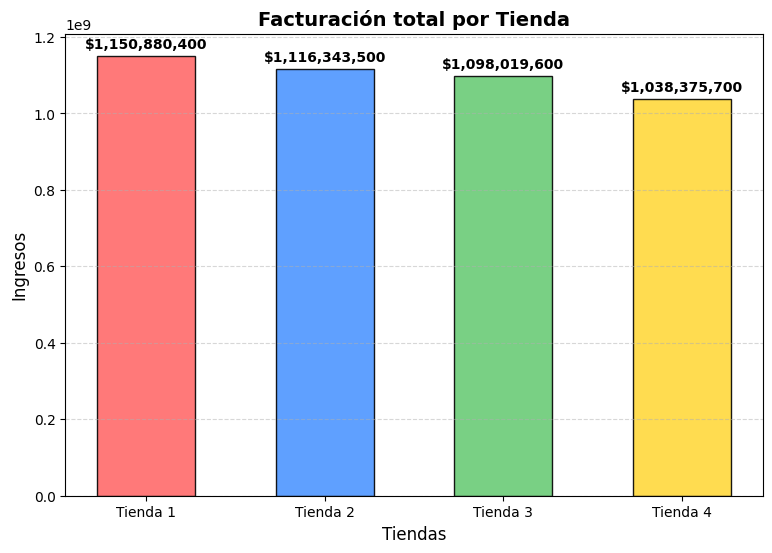

In [ ]:
colores = ['#FF6B6B', '#4D96FF', '#6BCB77', '#FFD93D']

#Grafico de barras
plt.figure(figsize=(9, 6))
barras = plt.bar(tiendas, ingresos, width=0.55, color=colores, edgecolor="black", alpha=0.9) #margenes

#titulos
plt.title('Facturación total por Tienda', fontsize=14, fontweight="bold")
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

#agregar valores encima de cada barra
for barra in barras:
    valory = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valory + (valory*0.01),  #un poquito arriba
             f"${valory:,.0f}", ha='center', va='bottom', fontsize=10, fontweight="bold") #numeros mas grandes


# 2. Ventas por categoría

In [ ]:
#sumar precios por tienda y categoria
#df se usa por costumbre para indicar que esa variable contiene un DataFrame de pandas
facturaciontienda = (
    df_tiendas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index(name='Facturación Total')
)

print("Facturación por tienda y categoría:")
print(facturaciontienda)

Facturación por tienda y categoría:
      Tienda   Categoría del Producto  Facturación Total
0   Tienda 1  Artículos para el hogar         12698400.0
1   Tienda 1     Deportes y diversión         39290000.0
2   Tienda 1        Electrodomésticos        363685200.0
3   Tienda 1             Electrónicos        429493500.0
4   Tienda 1   Instrumentos musicales         91299000.0
5   Tienda 1                 Juguetes         17995700.0
6   Tienda 1                   Libros          8784900.0
7   Tienda 1                  Muebles        187633700.0
8   Tienda 2  Artículos para el hogar         14746900.0
9   Tienda 2     Deportes y diversión         34744500.0
10  Tienda 2        Electrodomésticos        348567800.0
11  Tienda 2             Electrónicos        410831100.0
12  Tienda 2   Instrumentos musicales        104990300.0
13  Tienda 2                 Juguetes         15945400.0
14  Tienda 2                   Libros         10091200.0
15  Tienda 2                  Muebles        1764263

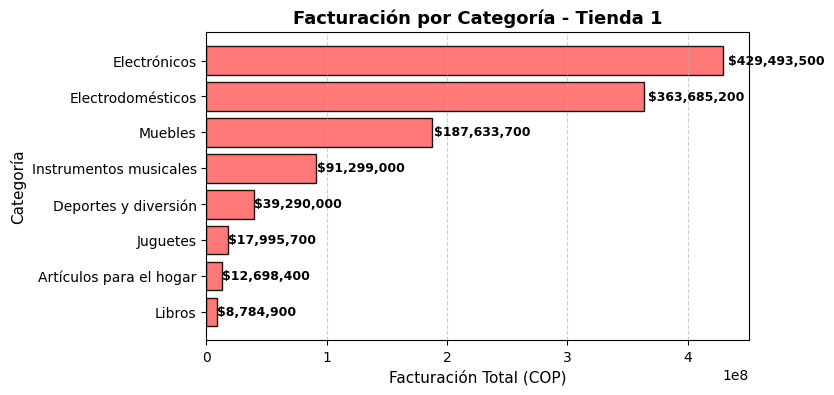

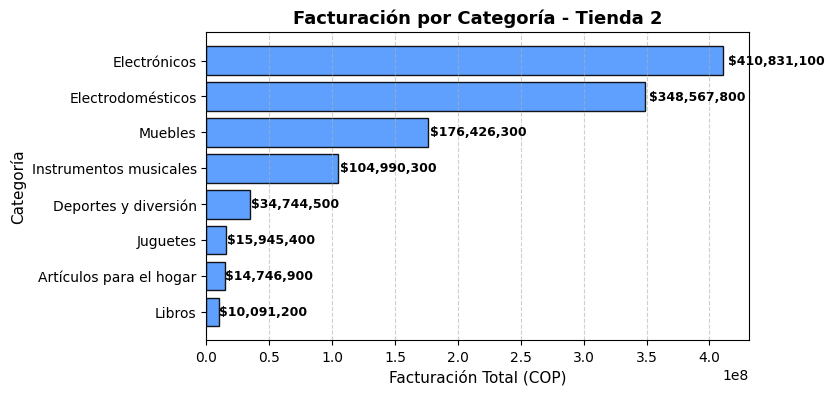

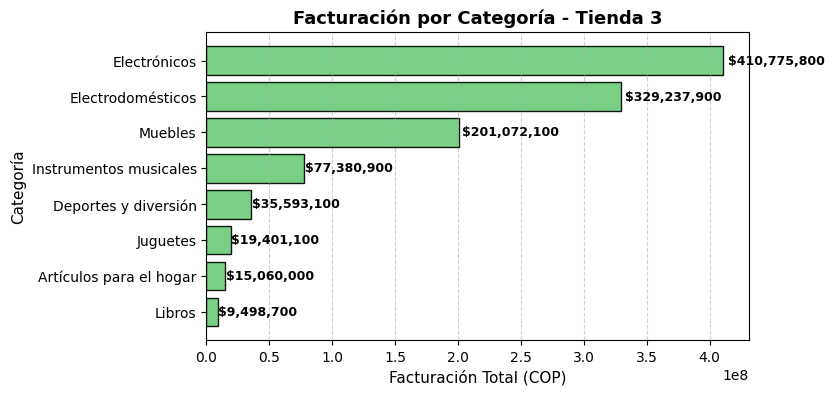

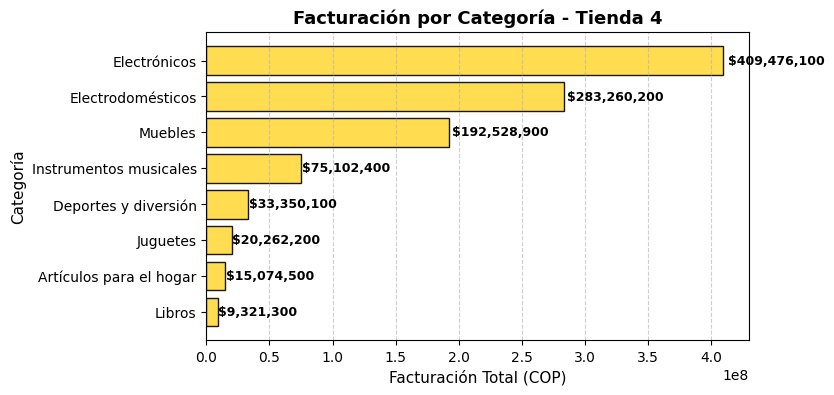

In [ ]:
#Lista de tiendas
tiendas_unicas = facturaciontienda['Tienda'].unique()
colores = ['#FF6B6B', '#4D96FF', '#6BCB77', '#FFD93D']

#Iterar sobre cada tienda y graficar
for tienda, color in zip(tiendas_unicas, colores):
    #filtrar datos de la tienda actual
    df_temp = facturaciontienda[facturaciontienda['Tienda'] == tienda]

    #irdenar de mayor a menor por facturación total
    df_temp = df_temp.sort_values(by='Facturación Total', ascending=False)
    plt.figure(figsize=(7, 4))

    #crear barras horizontales
    barras = plt.barh(df_temp['Categoría del Producto'],
                      df_temp['Facturación Total'],
                      color=color, edgecolor="black", alpha=0.9)

    #titulos
    plt.title(f'Facturación por Categoría - {tienda}', fontsize=13, fontweight="bold")
    plt.xlabel('Facturación Total (COP)', fontsize=11)
    plt.ylabel('Categoría', fontsize=11)

    #Lineas de referencia en el eje X
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    #Invertir eje Y para que el valor mayor quede arriba
    plt.gca().invert_yaxis()

    #agregar etiquetas con los valores en cada barra
    for barra in barras:
        valorx = barra.get_width()
        plt.text(valorx + (valorx*0.01),                      #posicion X un poquito a la derecha
                 barra.get_y() + barra.get_height()/2,        #centrado en Y
                 f"${valorx:,.0f}",                           #formato con separador de miles
                 va='center', fontsize=9, fontweight="bold")



# 3. Calificación promedio de la tienda


In [ ]:
#calcular promedio de calificaciones por tienda
promedioTienda = df_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
promedioTienda['Calificación'] = promedioTienda['Calificación'].round(2) #redondear a 2 decimales

print("Calificación promedio por tienda:")
print(promedioTienda)

Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


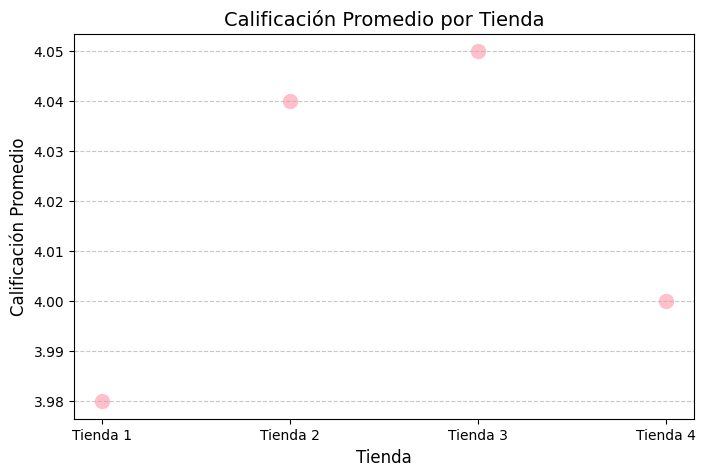

In [ ]:
# Graficar calificación promedio por tienda (diagrama de puntos)
plt.figure(figsize=(8, 5))
plt.scatter(promedioTienda['Tienda'], promedioTienda['Calificación'], color='pink', s=100)

# Personalización del gráfico
plt.title('Calificación Promedio por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Función para encontrar la categoría con mayor o menor cantidad dentro de un DataFrame
def extremos(df, tipo='max'):
    if tipo == 'max':
        valor = df['Cantidad'].max()  # mayor cantidad
    else:
        valor = df['Cantidad'].min()  # menor cantidad

    # Filtra categorías que tienen ese valor (puede haber empate)
    cats = df[df['Cantidad'] == valor]['Categoría del Producto'].tolist()
    return cats, valor

# Lista donde guardamos los resultados por tienda
resumen = []

# Iteramos por cada tienda
for t in cantidad_por_tienda_categoria['Tienda'].unique():
    df_t = cantidad_por_tienda_categoria[cantidad_por_tienda_categoria['Tienda'] == t]

    # Categorías con mayor cantidad
    cat_max, cant_max = extremos(df_t, tipo='max')

    # Categorías con menor cantidad
    cat_min, cant_min = extremos(df_t, tipo='min')

    # Guardamos en una lista de diccionarios
    resumen.append({
        'Tienda': t,
        'Cat_Mayor': "\n".join(cat_max),
        'Cant_Mayor': cant_max,
        'Cat_Menor': "\n".join(cat_min),
        'Cant_Menor': cant_min
    })

# Convertimos la lista a DataFrame
df_resumen = pd.DataFrame(resumen)

print("Extremos por tienda:")
print(df_resumen)



Extremos por tienda:
     Tienda Cat_Mayor  Cant_Mayor  \
0  Tienda 1   Muebles         465   
1  Tienda 2   Muebles         442   
2  Tienda 3   Muebles         499   
3  Tienda 4   Muebles         480   

                                         Cat_Menor  Cant_Menor  
0                          Artículos para el hogar         171  
1                          Artículos para el hogar         181  
2  Artículos para el hogar\nInstrumentos musicales         177  
3                           Instrumentos musicales         170  


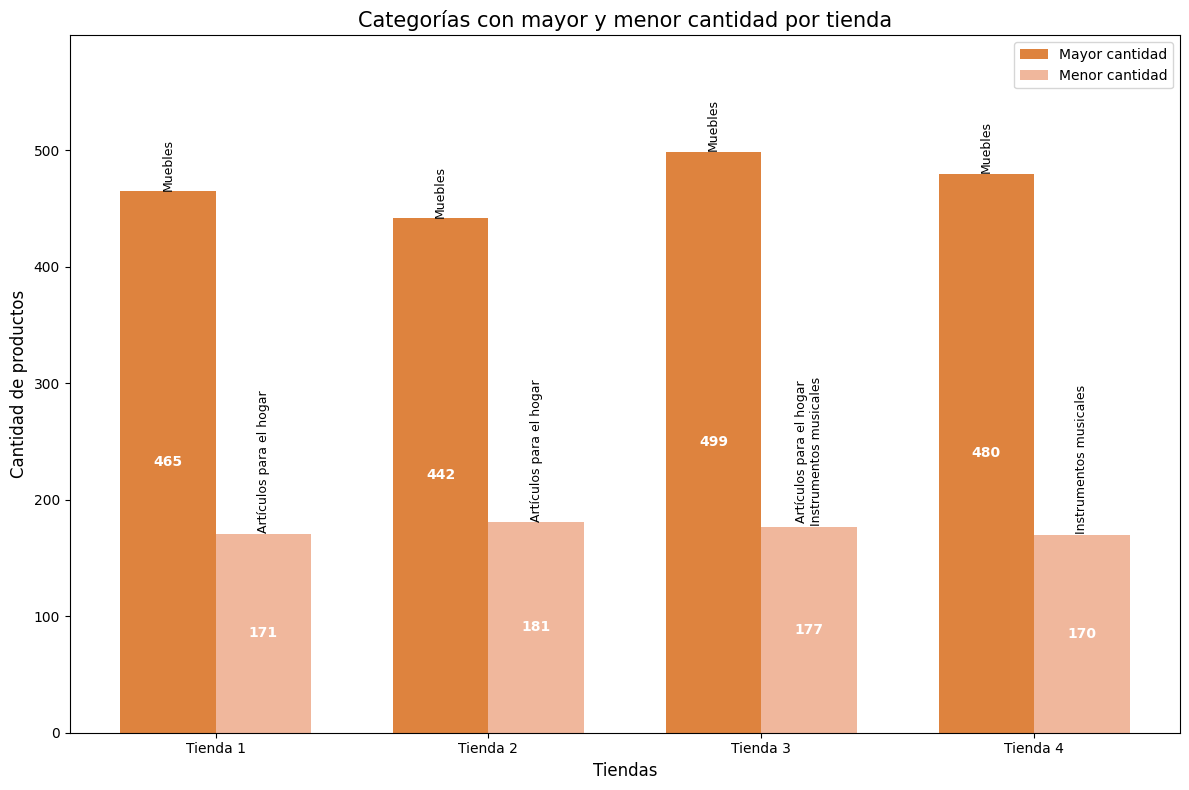

In [ ]:
#Extraer los datos del DataFrame con los extremos
tiendas = df_extremos_por_tienda['Tienda'].tolist()
cantidades_mayor = df_extremos_por_tienda['Cantidad Mayor'].tolist()
cantidades_menor = df_extremos_por_tienda['Cantidad Menor'].tolist()
categorias_mayor = df_extremos_por_tienda['Categorías Mayor'].tolist()
categorias_menor = df_extremos_por_tienda['Categorías Menor'].tolist()

#crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

#definir posiciones de las barras
x = np.arange(len(tiendas))  #posiciones en el eje X
width = 0.35  #ancho de cada barra

#Dibujar las barras
bars_mayor = ax.bar(x - width/2, cantidades_mayor, width, label='Mayor cantidad', color='#DE833E')
bars_menor = ax.bar(x + width/2, cantidades_menor, width, label='Menor cantidad', color='#F0B79C')

#Configuración de título
ax.set_xlabel('Tiendas', fontsize=12)
ax.set_ylabel('Cantidad de productos', fontsize=12)
ax.set_title('Categorías con mayor y menor cantidad por tienda', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

#función auxiliar para añadir etiquetas en las barras
def add_labels(barras, categorias, color_texto="white"):
    for bar, categoria in zip(barras, categorias):
        altura = bar.get_height()

        #Etiqueta numérica (dentro de la barra)
        ax.text(bar.get_x() + bar.get_width()/2, altura/2,
                f'{int(altura)}', ha='center', va='center',
                fontsize=10, color=color_texto, fontweight='bold')

        #etiqueta con la categoría (arriba de la barra, vertical)
        ax.text(bar.get_x() + bar.get_width()/2, altura + 0.3,
                categoria, ha='center', va='bottom',
                fontsize=9, color='black', rotation=90)

#aplicar etiquetas a ambas series de barras
add_labels(bars_mayor, categorias_mayor, color_texto="white")
add_labels(bars_menor, categorias_menor, color_texto="white")

#ajustar limites para que haya espacio para las etiquetas
plt.ylim(0, max(max(cantidades_mayor), max(cantidades_menor)) * 1.2)

plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

In [ ]:
#calcular promedio de costos de envío por tienda
promedio_tienda = df_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()
#Redondear a 2 decimales
promedio_tienda['Costo de envío'] = promedio_tienda['Costo de envío'].round(2)

print("Costos de envío promedio por tienda:")
print(promedio_tienda)


Costos de envío promedio por tienda:
     Tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


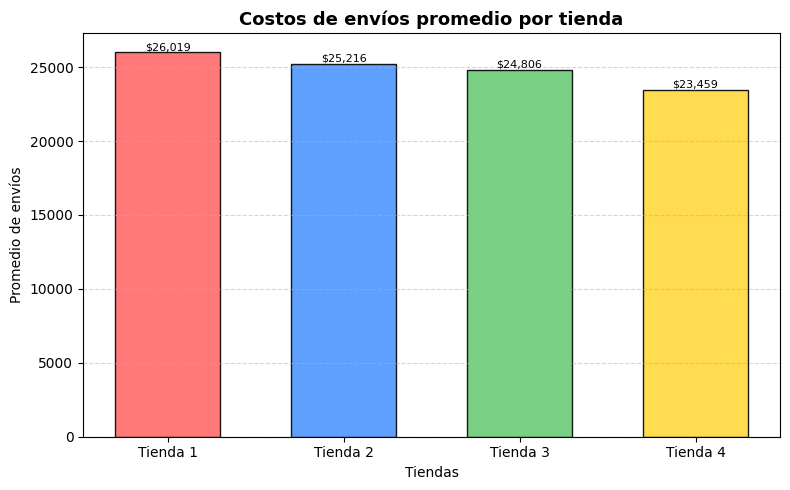

In [ ]:
colores_tiendas = {
    'Tienda 1': '#FF6B6B',
    'Tienda 2': '#4D96FF',
    'Tienda 3': '#6BCB77',
    'Tienda 4': '#FFD93D'
}

#grafico de envíos promedio por tienda
plt.figure(figsize=(8, 5))

#dibujar barras con colores personalizados
barras = plt.bar(
    promedio_tienda['Tienda'],
    promedio_tienda['Costo de envío'],
    color=[colores_tiendas[t] for t in promedio_tienda['Tienda']],
    width=0.6,
    edgecolor="black",
    alpha=0.9
)
plt.title('Costos de envíos promedio por tienda', fontsize=13, fontweight="bold")
plt.xlabel('Tiendas')
plt.ylabel('Promedio de envíos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

#etiquetas en las barras
for barra in barras:
    valory = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        valory,
        f"${valory:,.0f}",
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

## 6. Conlcusiones

El análisis de ingresos totales muestra que Tienda 4 registra el nivel más bajo, con aproximadamente $1,038.375, lo que la convierte en la de menor rendimiento económico en términos de facturación bruta.

En cuanto a la cantidad de ventas por categoría, aunque las diferencias no son extremas, Tienda 4 presenta cifras consistentemente más bajas frente a las demás tiendas, lo que explica en parte sus ingresos reducidos.

Respecto a la calificación promedio de los clientes, Tienda 4 obtiene un puntaje relativamente alto. Esto indica que su bajo desempeño no se debe a problemas de satisfacción o experiencia del cliente, sino posiblemente a factores externos como la ubicación, la demanda del mercado o la estrategia comercial.

En términos de costos de envío promedio, Tienda 1 registra el más alto 25,018.61, mientras que Tienda 4 presenta el más bajo $23,459.46. Sin embargo, esta diferencia no parece ser suficiente para compensar su bajo volumen de ventas e ingresos.

Por lo tanto, aunque Tienda 4 mantiene un buen nivel de satisfacción en sus clientes y costos de envío competitivos, su bajo nivel de ingresos y ventas por categoría la posicionan como la candidata más viable para cierre o reestructuración.